# Matplotlib Traffic Network Graph

## Data Importation

In [ ]:
import pandas as pd

file_path_1 = '.../traffic/transformed_segment_reports.csv'
segment_df = pd.read_csv(file_path_1)
segment_df.head(10)

,_id,updated_at,segment_id,velocity,date,weekday,period,LOS
0,0,2020-07-03 14:55:31.869000+00:00,24845,20,2020-07-03,4,period_14_30,D
1,1,2020-07-03 15:02:56.048000+00:00,33923,10,2020-07-03,4,period_15_00,F
2,2,2020-07-04 08:15:52.696000+00:00,33824,5,2020-07-04,5,period_8_00,F
3,3,2020-07-04 08:15:59.903000+00:00,33824,5,2020-07-04,5,period_8_00,F
4,4,2020-07-04 08:16:08.201000+00:00,33824,5,2020-07-04,5,period_8_00,F
5,5,2020-07-04 08:16:11.070000+00:00,33824,5,2020-07-04,5,period_8_00,F
6,6,2020-07-04 08:16:18.512000+00:00,33824,5,2020-07-04,5,period_8_00,F
7,7,2020-07-04 08:16:21.798000+00:00,33824,5,2020-07-04,5,period_8_00,F
8,8,2020-07-04 08:16:24.746000+00:00,33824,5,2020-07-04,5,period_8_00,F
9,9,2020-07-04 08:16:27.606000+00:00,33824,5,2020-07-04,5,period_8_00,F


In [ ]:
file_path_2 = '.../traffic/daily_traffic_los.csv'
traffic_df = pd.read_csv(file_path_2)
traffic_df.head(10)

/tmp/ipython-input-2182741281.py:2: DtypeWarning: Columns (38,39,40,41,42,43,44,47,49) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic_df = pd.read_csv(file_path_2)


,_id,segment_id,date,weekday,period_0_00,period_0_30,period_1_00,period_1_30,period_2_00,period_2_30,...,period_23_00,period_23_30,s_node_id,e_node_id,length,street_id,max_velocity,street_level,street_name,street_type
0,0,26,2021-04-16,4,NaN,A,NaN,NaN,NaN,NaN,...,NaN,NaN,366428456,366416066,116,32575820,NaN,4,Nguyễn Văn Bá,tertiary
1,1,33,2020-08-02,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,C,366469460,3792257828,26,32575862,NaN,3,Đường số 5,secondary
2,2,33,2020-08-03,0,D,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,366469460,3792257828,26,32575862,NaN,3,Đường số 5,secondary
3,3,67,2021-03-09,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,366403668,5755066033,7,32575862,NaN,3,Đường số 5,secondary
4,4,67,2021-03-23,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,366403668,5755066033,7,32575862,NaN,3,Đường số 5,secondary
5,5,70,2020-08-02,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,D,5816921541,4614188871,8,32575864,40.0,3,Châu Văn Liêm,secondary
6,6,70,2020-08-03,0,E,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5816921541,4614188871,8,32575864,40.0,3,Châu Văn Liêm,secondary
7,7,71,2020-08-02,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,E,366441747,5738173336,43,32575869,NaN,4,Lê Văn Thịnh,unclassified
8,8,71,2020-08-03,0,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,366441747,5738173336,43,32575869,NaN,4,Lê Văn Thịnh,unclassified
9,9,161,2020-09-11,4,NaN,A,NaN,NaN,NaN,NaN,...,NaN,NaN,3202462316,3202462317,21,32575935,NaN,3,Tân Phú,primary_link


## Data Preparation

In [8]:
# Filter for street_level = 3
traffic_df = traffic_df[traffic_df['street_level'] == 3]

# Merge LOS into traffic_df
merged_df = traffic_df.merge(
    segment_df[['segment_id', 'LOS']],
    on='segment_id',
    how='left'
)

los_mapping = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6
}
merged_df['LOS'] = merged_df['LOS'].map(los_mapping)

# Variable Selection and Data Cleaning by Removing Null Entries
edges_df = merged_df[['s_node_id', 'e_node_id', 'length', 'street_name', 'street_type', 'LOS']].dropna()
edges_df

# Filtering for top 5000 longest segments
short_5k_edges = edges_df.nsmallest(5000, 'length')
short_5k_edges

,s_node_id,e_node_id,length,street_name,street_type,LOS
6396,5814201563,5814201562,0,Trần Hưng Ðạo,secondary,6
6397,5814201563,5814201562,0,Trần Hưng Ðạo,secondary,5
6398,5814201563,5814201562,0,Trần Hưng Ðạo,secondary,6
6399,5814201563,5814201562,0,Trần Hưng Ðạo,secondary,4
6400,5814201563,5814201562,0,Trần Hưng Ðạo,secondary,5
...,...,...,...,...,...,...
13850,2299409186,2299409158,7,Nguyễn Thị Diệu Hương,primary_link,6
13851,2299409186,2299409158,7,Nguyễn Thị Diệu Hương,primary_link,6
13852,2299409186,2299409158,7,Nguyễn Thị Diệu Hương,primary_link,1
13853,2299409186,2299409158,7,Nguyễn Thị Diệu Hương,primary_link,6


## Network Graph Plotting

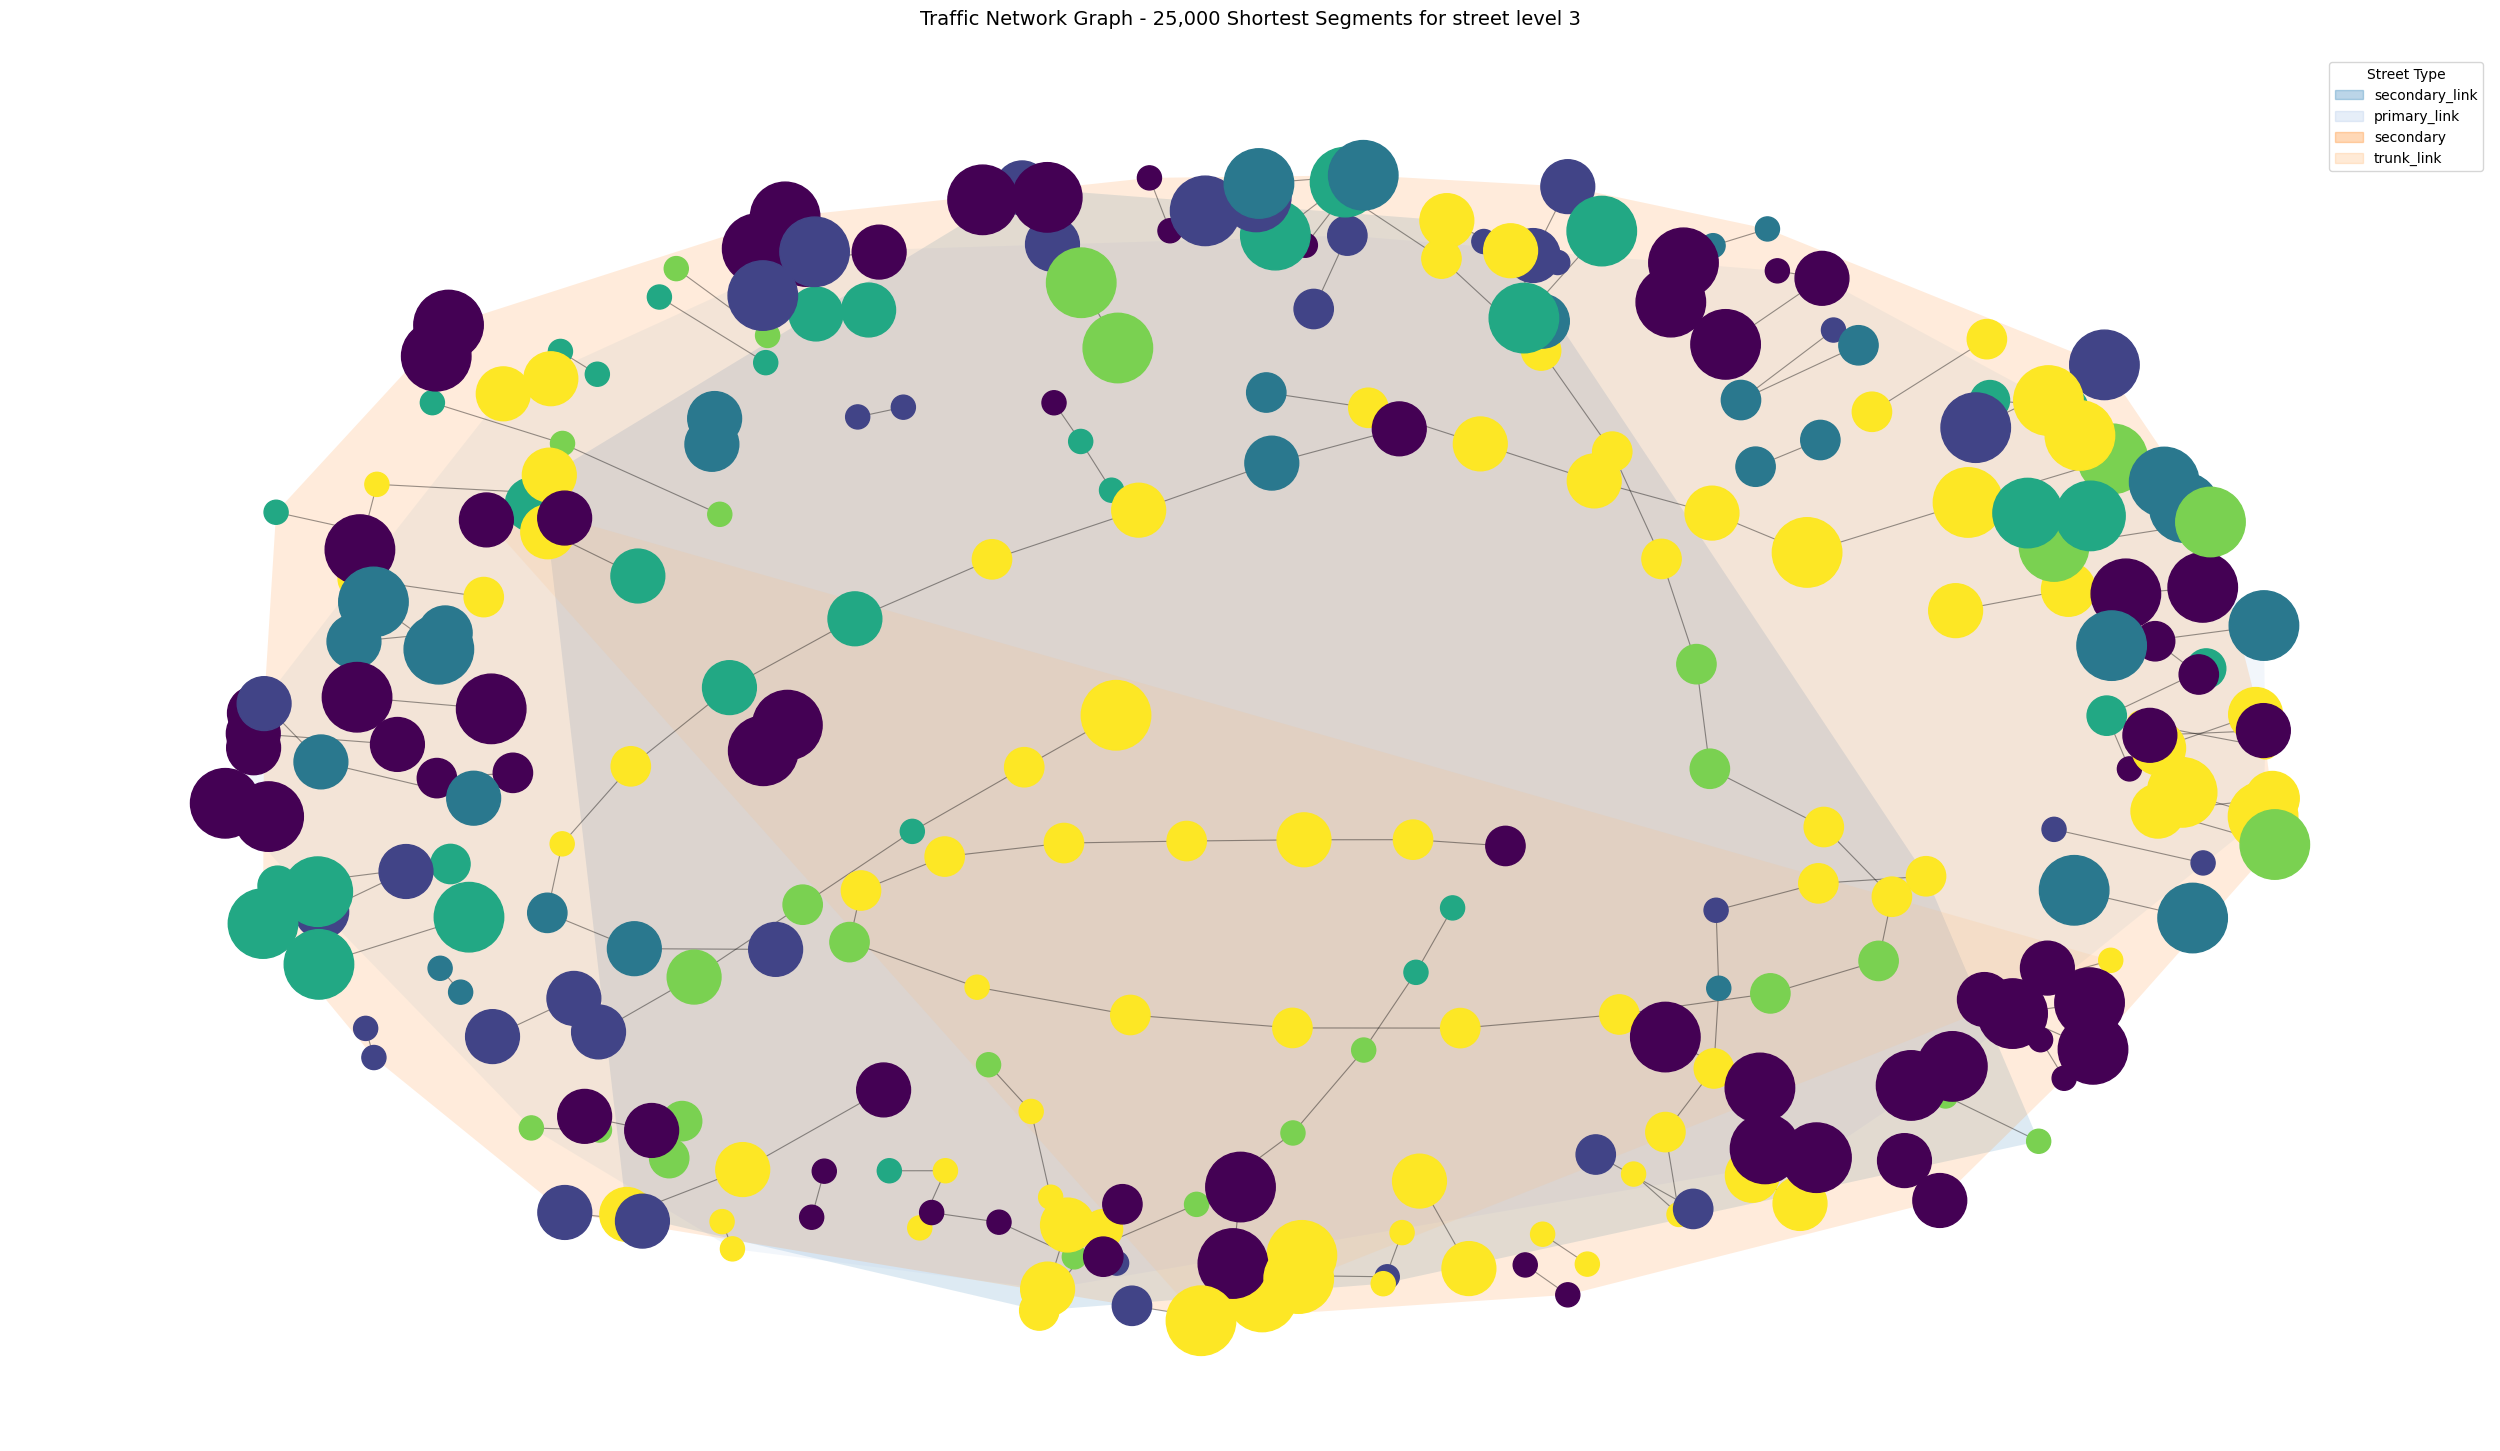

In [9]:
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import networkx as nx


# Graph Initialization
G = nx.Graph()

# Edge and Attributes
for _, row in short_5k_edges.iterrows():
    G.add_edge(
        row['s_node_id'],
        row['e_node_id'],
        length=row['length'],
        street_name=row['street_name'],
        LOS=row['LOS'],
        street_type=row['street_type']
    )

# Mapping LOS to nodes
node_los_map = {}
node_street_type_map = {}
for node in G.nodes():
    los_values = [d['LOS'] for _, _, d in G.edges(node, data=True) if d['LOS'] is not None]
    node_los_map[node] = max(los_values) if los_values else None
    stypes = [d['street_type'] for _, _, d in G.edges(node, data=True) if d['street_type'] is not None]
    node_street_type_map[node] = max(set(stypes), key=stypes.count) if stypes else None

# Node Colors by LOS
los_values_series = pd.Series(node_los_map)
norm = plt.Normalize(vmin=los_values_series.min(), vmax=los_values_series.max())
cmap = plt.cm.viridis
node_colors = [
    cmap(norm(node_los_map[node])) if node_los_map[node] is not None else (0.5, 0.5, 0.5, 0.5)
    for node in G.nodes()
]

# Node sizes computation using bins
node_length_map = {}
for node in G.nodes():
    lengths = [d['length'] for _, _, d in G.edges(node, data=True)]
    node_length_map[node] = sum(lengths) / len(lengths) if lengths else 0

length_series = pd.Series(node_length_map)
bins = pd.qcut(length_series, q=4, labels=False, duplicates='drop')
bin_size_map = {0: 300, 1: 800, 2: 1500, 3: 2500}
node_sizes = [bin_size_map[bins[node]] for node in G.nodes()]

# Street type overlays colors
unique_street_types = list(set(node_street_type_map.values()) - {None})
street_type_color_map = {stype: plt.cm.tab20(i % 20) for i, stype in enumerate(unique_street_types)}

# Network Plot
plt.figure(figsize=(32, 18))
pos = nx.spring_layout(G, k=0.15, seed=42)

# Street type overlays
for stype, color in street_type_color_map.items():
    cluster_nodes = [n for n in G.nodes() if node_street_type_map[n] == stype]
    if len(cluster_nodes) < 3:
        continue

    points = [pos[n] for n in cluster_nodes]
    points_array = np.array(points)

    try:
        hull = ConvexHull(points_array)
        hull_points = points_array[hull.vertices]
        polygon = mpatches.Polygon(
            hull_points,
            closed=True,
            facecolor=color,
            alpha=0.15,  # translucent fill
            edgecolor=None
        )
        plt.gca().add_patch(polygon)
    except Exception:
        pass  # Skip if hull fails

# Nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors)
nx.draw_networkx_edges(G, pos, alpha=0.4, width=0.8)

# Legend for Street type
overlay_patches = [mpatches.Patch(color=color, alpha=0.3, label=stype) for stype, color in street_type_color_map.items()]
plt.legend(handles=overlay_patches, title="Street Type", loc="upper right")
# Title
plt.title(
    "Traffic Network Graph - 25,000 Shortest Segments for street level 3\n",
    fontsize=14
)
plt.axis("off")
plt.show()